In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn.metrics as metric

In [2]:
x = np.linspace(0, 20).reshape(50, 1)
y = -2*x + 1

In [3]:
X = np.c_[np.ones(x.shape[0]).reshape(x.shape[0]), x]
theta = np.random.rand(X.shape[1], 1)

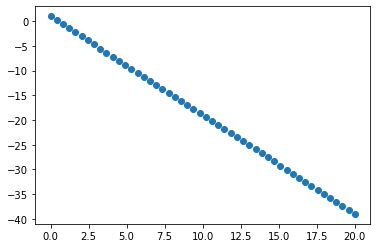

In [4]:
plt.scatter(x, y)

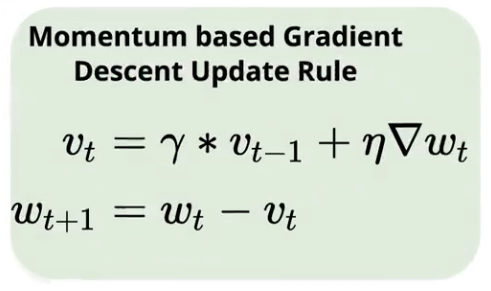

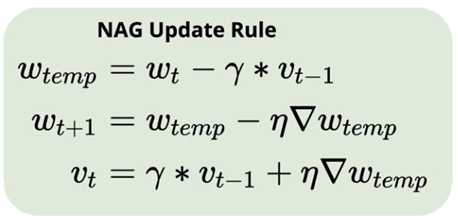

In [19]:
def compute_hypothesis(theta, x):
    return x @ theta

def compute_cost(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / 2*m) * np.sum(np.square(y_predict - y))

def compute_gradient(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / m) * (x.T @ (y_predict - y))

def plots(theta, X, x, y, theta_history, cost_history):
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0,0].title.set_text("Best Fit Line")
    axs[0,0].plot(x, compute_hypothesis(theta, X), c='r')
    axs[0,0].scatter(x, y)

    axs[0,1].set_xlabel("Iterations")
    axs[0,1].set_ylabel("Cost Function")
    axs[0,1].plot(cost_history, marker='o')

    axs[1,0].set_xlabel("Weight 0")
    axs[1,0].set_ylabel("Cost")
    axs[1,0].plot(np.array(theta_history)[:, 0] , cost_history[:] , marker="o")


    axs[1,1].set_xlabel("Weight 1")
    axs[1,1].set_ylabel("Cost")
    axs[1,1].plot(np.array(theta_history)[:, 1] , cost_history[:] , marker="o")

def batch_gradient_descent_with_momentum_and_nesterov(theta, x, y, 
                           learning_rate=0.001, epsilon=0.01, max_iterations=1000, batch_size=x.shape[0],
                           NAG=False, gama=None):
    
    v = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 0
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and abs(np.sum(gradient)) >= epsilon:
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            
            if gama == None:
                theta -= learning_rate * gradient
            
            elif NAG == True:
                theta_temp = theta - gama * v
                gradient = compute_gradient(theta_temp, x_ith_batch, y_ith_batch)
                theta = theta_temp - learning_rate * gradient
                v = gama * v + learning_rate * gradient
            
            else:
                v = gama * v + learning_rate * gradient
                theta -= v

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
            counter += 1
    
    return theta, theta_history, cost_history, counter, hypothesis_history

---
### Momentum:

In [14]:
weights, theta_history, cost_history, counter, hypothesis_lines = batch_gradient_descent_with_momentum_and_nesterov(np.random.rand(X.shape[1], 1), X, y, epsilon=0.01, gama=0.95, max_iterations=1000)
weights

array([[ 0.49822438],
       [-1.97513417]])

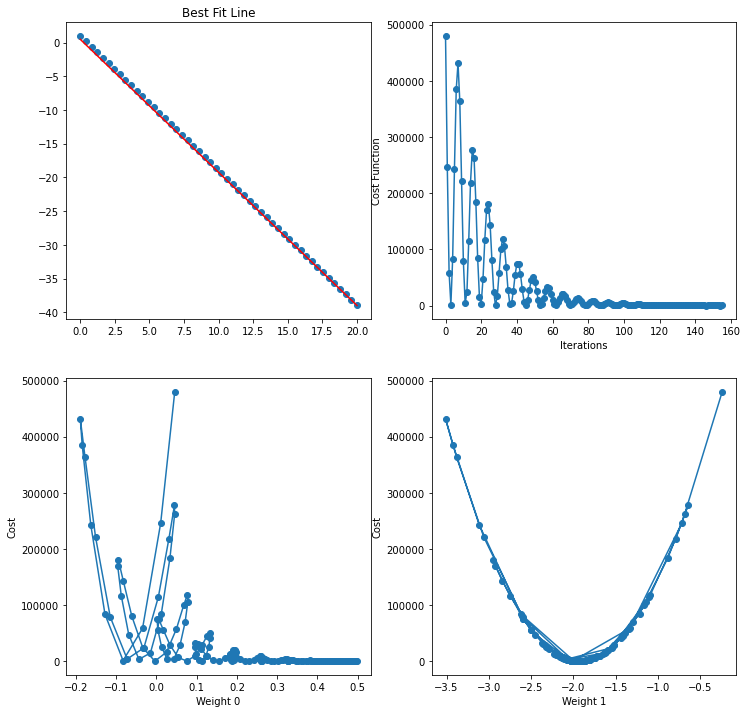

In [15]:
plots(weights, X, x, y, theta_history, cost_history)

In [16]:
weights1, theta_history1, cost_history1, counter1, hypothesis_lines1 = batch_gradient_descent_with_momentum_and_nesterov(np.random.rand(X.shape[1], 1), X, y, epsilon=0.01, gama=0, max_iterations=1000)


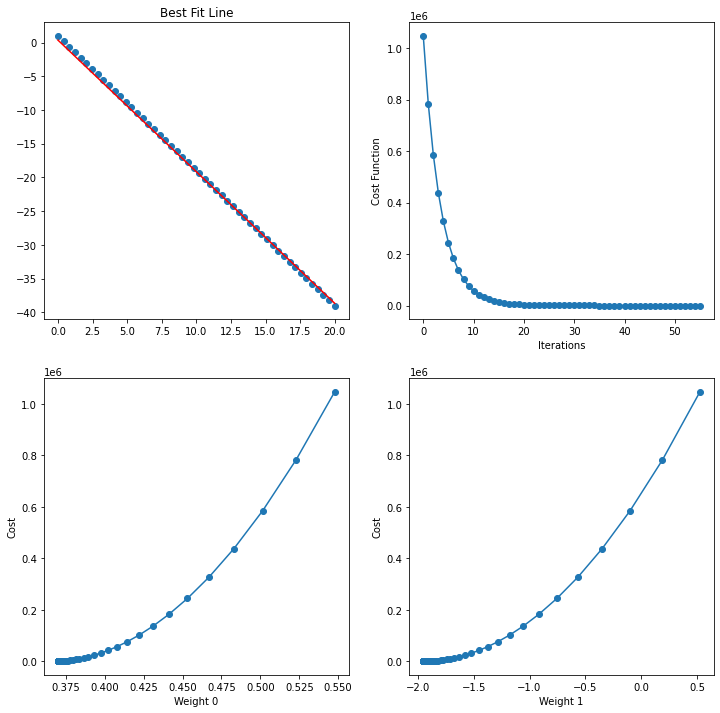

In [17]:
plots(weights1, X, x, y, theta_history1, cost_history1)

----
### Nesterov:

In [20]:
weights2, theta_history2, cost_history2, counter2, hypothesis_lines2 = batch_gradient_descent_with_momentum_and_nesterov(np.random.rand(X.shape[1], 1), X, y, epsilon=0.01, gama=0.9, max_iterations=1000, NAG=True)


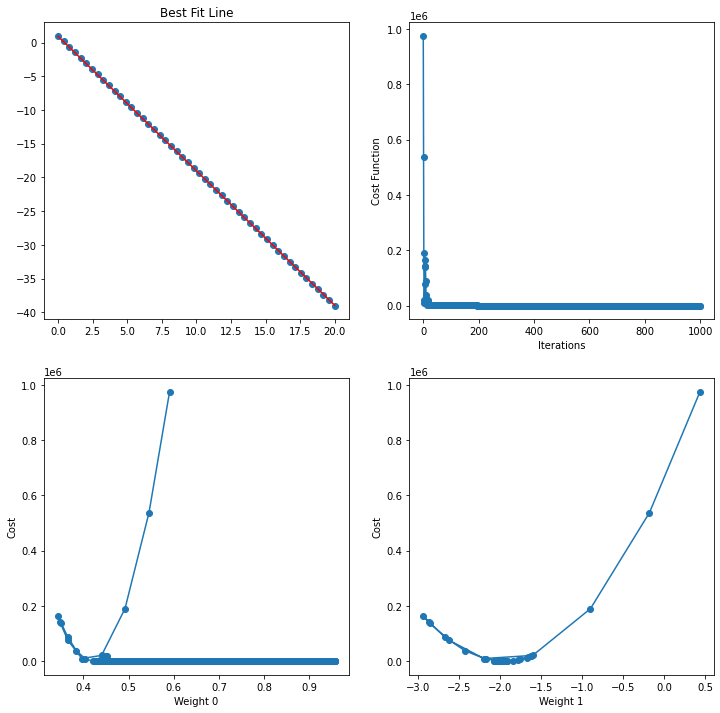

In [21]:
plots(weights2, X, x, y, theta_history2, cost_history2)